In [10]:
# from google.colab import drive
# drive.mount('/content/drive')
# !/opt/bin/nvidia-smi

In [11]:
# Load Data

import scipy
#from scipy import io
import numpy as np
#from numpy import expand_dims
#import os
#from PIL import Image
#import matplotlib.pyplot as plt
from sklearn import preprocessing


class Dataset1:
    def __init__(self, prob=1):
        self.prob = prob

        self.signals = self.load_signals()
        self.index = self.load_index()

    def batches(self, batch_size=32):

        idx = np.arange(self.signals.shape[0])
        np.random.shuffle(idx)
        self.signals = self.signals[idx]
        self.index = self.index[idx]

        n_batches = self.signals.shape[0] // batch_size
        for ii in range(0, int(n_batches * self.prob)):
            x = self.signals[ii * batch_size:(ii + 1) * batch_size]
            y = self.index[ii * batch_size:(ii + 1) * batch_size]
            
            yield x, y


    def load_signals(self):
        # train_dataset_struct = scipy.io.loadmat('/content/drive/My Drive/Train_Signals/Input_qpsk_signal.mat')
        # train_dataset_struct = scipy.io.loadmat('/content/drive/My Drive/Train_Signals/Input_qpsk_radar_signal.mat') 
        train_dataset_struct = scipy.io.loadmat('C:/Users/kenla/Desktop/113-2/AI_Lab_WC/module_3/AILab202505/data/Train_Signals/Input_qpsk_radar_signal.mat')
        train_dataset = train_dataset_struct['qpsk_set']
        training_set = np.asarray(train_dataset, dtype = 'float32')
        '''
        You can try some sklearn.preprocessing methods here. It may give you some surprises.
        Or you can skip this comment and just run it. It will work well too.
        Also, you can compare the test_accuracy figure w/ or w/o preprocessing.
        '''
        print(training_set.shape)
        return training_set

    def load_index(self):
        # train_index_struct = scipy.io.loadmat('/content/drive/My Drive/Train_Signals/Truth_index.mat')
        # train_index_struct = scipy.io.loadmat('/content/drive/My Drive/Train_Signals/Truth_radar_index.mat')
        train_index_struct = scipy.io.loadmat('C:/Users/kenla/Desktop/113-2/AI_Lab_WC/module_3/AILab202505/data/Train_Signals/Truth_radar_index.mat')
        train_index = train_index_struct['symbol_index']
        index_set = np.asarray(train_index, dtype = 'float32')
        print(index_set.shape)
        return index_set


class Dataset2:
    def __init__(self, prob=1):
        self.prob = prob

        self.signals = self.load_signals()
        self.index = self.load_index()

    def batches(self, batch_size=100):

        idx = np.arange(self.signals.shape[0])
        np.random.shuffle(idx)
        self.signals = self.signals[idx]
        self.index = self.index[idx]

        n_batches = self.signals.shape[0] // batch_size
        for ii in range(0, int(n_batches * self.prob)):
            x = self.signals[ii * batch_size:(ii + 1) * batch_size]
            y = self.index[ii * batch_size:(ii + 1) * batch_size]
            
            yield x, y


    def load_signals(self):
        '''
        Please write your code here.
        How to load signals from test_dataset?
        '''
        # test_dataset_struct = scipy.io.loadmat('/content/drive/My Drive/Test_Signals/Input_qpsk_signal.mat')
        # test_dataset_struct = scipy.io.loadmat('/content/drive/My Drive/Test_Signals/Input_qpsk_radar_signal.mat')
        test_dataset_struct = scipy.io.loadmat('C:/Users/kenla/Desktop/113-2/AI_Lab_WC/module_3/AILab202505/data/Test_Signals/Testing_qpsk_radar_signal.mat')
        test_dataset = test_dataset_struct['qpsk_set']
        testing_set = np.asarray(test_dataset, dtype = 'float32')
        '''
        You can try some sklearn.preprocessing methods here. It may give you some surprises.
        Or you can skip this comment and just run it. It will work well too.
        Also, you can compare the test_accuracy figure w/ or w/o preprocessing.
        '''
        print(testing_set.shape)
        return testing_set

    def load_index(self):
        '''
        Please write your code here.
        How to load index from test_dataset?
        '''
        # test_index_struct = scipy.io.loadmat('/content/drive/My Drive/Test_Signals/Truth_index.mat')
        # test_index_struct = scipy.io.loadmat('/content/drive/My Drive/Test_Signals/Truth_radar_index.mat')
        test_index_struct = scipy.io.loadmat('C:/Users/kenla/Desktop/113-2/AI_Lab_WC/module_3/AILab202505/data/Test_Signals/Test_radar_index.mat')
        test_index = test_index_struct['symbol_index']
        index_set = np.asarray(test_index, dtype = 'float32')
        print(index_set.shape)
        return index_set

In [12]:
# VAE Architecture
#from IPython import display

#import glob
#import imageio
#import matplotlib.pyplot as plt
#import numpy as np
#import PIL
import tensorflow as tf
#import tensorflow_probability as tfp
import time

class CVAE(tf.keras.Model):
    """Convolutional variational autoencoder."""

    def __init__(self, latent_dim):
      super(CVAE, self).__init__()
      self.latent_dim = latent_dim
      self.encoder = tf.keras.Sequential(
          [
                tf.keras.layers.Dense(1100, activation='relu', input_shape=(2200,)),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(512, activation='relu'),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(256, activation='relu'),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(128, activation='relu'),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(2 * self.latent_dim, activation=None)
          ]
      )

      self.decoder = tf.keras.Sequential(
          [
                tf.keras.layers.Dense(128, activation='relu', input_shape=(self.latent_dim,)),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(256, activation='relu'),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(512, activation='relu'),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(1100, activation='relu'),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(4, activation=None)
          ]
      )

#     @tf.function
#     def testing(self, x):
#       temp = self.encoder(x, training=False)
#       return temp

#     def sample(self, eps=None):
#       if eps is None:
#         eps = tf.random.normal(shape=(100, self.latent_dim))
#       return self.decode(eps, apply_sigmoid=True)
    @tf.function 
    def encode(self, x, training=False):
        mean, logvar = tf.split(self.encoder(x, training=training), num_or_size_splits=2, axis=1)
        return mean, logvar

    @tf.function
    def reparameterize(self, mean, logvar):
        eps = tf.random.normal(shape=mean.shape)
        return eps * tf.exp(logvar * .5) + mean

    @tf.function
    def decode(self, z, apply_sigmoid=False, training=False):
        logits = self.decoder(z, training=training)
        if apply_sigmoid:
            probs = tf.sigmoid(logits)
            return probs
        return logits

In [13]:
latent_dim = 100
train_dataset = Dataset1(prob=1)
test_dataset = Dataset2(prob=1)
Demodulator = CVAE(latent_dim)

(3000, 2200)
(3000, 4)
(300, 2200)
(300, 4)


In [14]:
optimizer = tf.keras.optimizers.Adam(1e-5)
@tf.function
def compute_loss(model, x, y, training=False):
    '''
    Please write your code here.
    Process: Encoder -> Z -> Decoder -> output(logit) -> calculate Loss
    e.g. z = model.encode(self, x, training)   # please add training term
    hint: loss = tf.reduce_mean("your loss function")
    
    
    '''
    mean, logvar = model.encode(x, training)
    z = model.reparameterize(mean, logvar)
    logits = model.decode(z, training)
    # loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits))
    
    kld_weight = 0.001
    # 重建損失
    recons_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits))

    # KL Divergence Loss
    kld_loss = -0.5 * tf.reduce_mean(
        tf.reduce_sum(1 + logvar - tf.square(mean) - tf.exp(logvar), axis=1)
    )

    loss = recons_loss + kld_weight * kld_loss
    return loss


@tf.function
def train_step(Demodulator, x, y, optimizer):
    with tf.GradientTape() as tape:
        loss = compute_loss(Demodulator, x, y, training=True)
    gradients = tape.gradient(loss, Demodulator.trainable_variables)
    optimizer.apply_gradients(zip(gradients, Demodulator.trainable_variables))

In [15]:
# Testing result
def testing_process(model, test_sample, test_index):
    '''
    Please write your code here.
    Similar to compute_loss() above.
    But remember, the output needs a sigmoid function.
    Also, set training=False in encode() and decode() because it's test data.
    '''
    mean, logvar = model.encode(test_sample, training=False)
    z = model.reparameterize(mean, logvar)
    predictions = model.decode(z, apply_sigmoid=True,training=False)
    predictions = predictions.numpy()
    error_times = 0
    est_index = np.argmax(predictions, axis=1)
    truth_index = np.argmax(test_index, axis=1)
    N = predictions.shape[0]
    accuracy = (est_index == truth_index).sum() / N
    return accuracy

(300, 2200)
(300, 4)
Epoch: 1, time elapse for current epoch: 3.4136710166931152, VAE_Loss: 0.5824044346809387
Epoch: 2, time elapse for current epoch: 0.782933235168457, VAE_Loss: 0.6229628324508667
Epoch: 3, time elapse for current epoch: 0.7529919147491455, VAE_Loss: 0.7421804666519165
Epoch: 4, time elapse for current epoch: 0.7165229320526123, VAE_Loss: 0.8025291562080383
Epoch: 5, time elapse for current epoch: 0.7558541297912598, VAE_Loss: 0.8738396167755127
Epoch: 6, time elapse for current epoch: 0.711766242980957, VAE_Loss: 0.8607223629951477
Epoch: 7, time elapse for current epoch: 0.7237505912780762, VAE_Loss: 0.76960289478302
Epoch: 8, time elapse for current epoch: 0.7942631244659424, VAE_Loss: 0.5694537162780762
Epoch: 9, time elapse for current epoch: 0.7166802883148193, VAE_Loss: 0.6904237270355225
Epoch: 10, time elapse for current epoch: 0.7241988182067871, VAE_Loss: 0.45619428157806396
Epoch: 11, time elapse for current epoch: 0.7534651756286621, VAE_Loss: 0.3762813

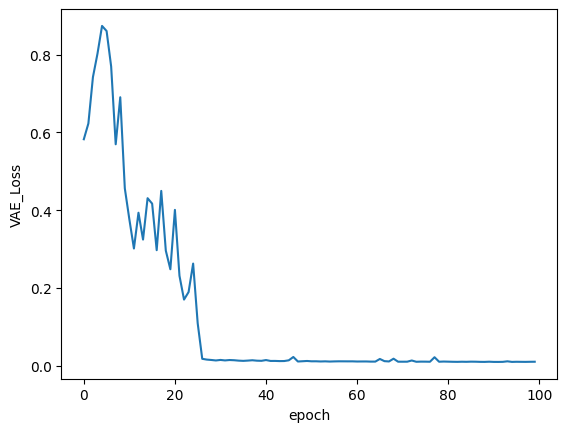

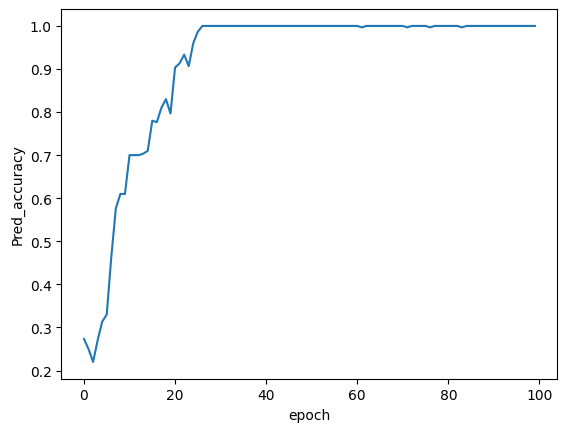

In [16]:
import matplotlib.pyplot as plt

test_sample = test_dataset.load_signals()
test_index = test_dataset.load_index()
# test_number = test_index.shape[0]
'''
You can set 'batch_size' any value you want as long as your GPU memory can handle it.
When you change 'batch_size', you need to change 'epochs' to get best result.
'''
batch_size = 32
epochs = 100

VAE_Loss = []
Pred_accuracy = []

for epoch in range(1, epochs + 1):
    start_time = time.time()
    for x, y in train_dataset.batches(batch_size):
#         tf.config.run_functions_eagerly(True)
        train_step(Demodulator, x, y, optimizer)
    
    ## calculate VAE_loss every epoch for figure
    VAE_loss = compute_loss(Demodulator, x, y)
    VAE_Loss.append(VAE_loss)
      
    ## calculate test_accuracy every epoch for figure
    accuracy = testing_process(Demodulator,test_sample,test_index)
    Pred_accuracy.append(accuracy)

    end_time = time.time()  

    print('Epoch: {}, time elapse for current epoch: {}, VAE_Loss: {}'
          .format(epoch, end_time - start_time, VAE_loss))

    if epoch % 100 == 0:    
        plt.figure()
        plt.plot(VAE_Loss)
        plt.xlabel('epoch')
        plt.ylabel('VAE_Loss')
        
        plt.figure()
        plt.plot(Pred_accuracy)
        plt.xlabel('epoch')
        plt.ylabel('Pred_accuracy')
        
        plt.show()


In [17]:
accuracy = testing_process(Demodulator, test_sample, test_index)
print('predict_accuracy={}'.format(accuracy))

predict_accuracy=1.0


In [18]:
## plot your estimate result
example = 0
test_example = test_sample[example,:]
mean, logvar = Demodulator.encode(test_sample)
z = Demodulator.reparameterize(mean, logvar)
predictions = Demodulator.decode(z, apply_sigmoid=True)
predictions = predictions.numpy()
truth_index = np.argmax(test_index[example,:])
est_index = np.argmax(predictions[example,:])
print('truth_index: ',truth_index)
print('est_index: ',est_index)

truth_index:  1
est_index:  1
